# Assignment 3
### Ostapovich Oleg

In [243]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Task 1

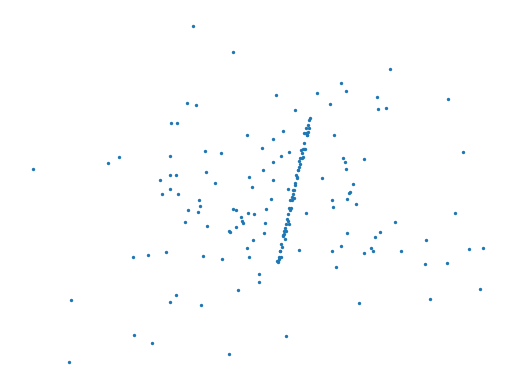

In [244]:
numofdots = 60
# general noise
x, y = np.random.normal(15,12,numofdots*2), np.random.normal(0,30,numofdots*2)
# line function with noise
a = 3
b = 3
t = np.linspace(0, 10, numofdots)
fun = a*t+b
fun = fun + np.random.normal(0,1,numofdots)

funx = np.concatenate((x,fun))
funy = np.concatenate((y,t))
plt.figure(frameon=False)
plt.scatter(funy, funx, s=2)
plt.axis('off')
plt.savefig('noisydata', bbox_inches='tight', pad_inches=0)
plt.show()

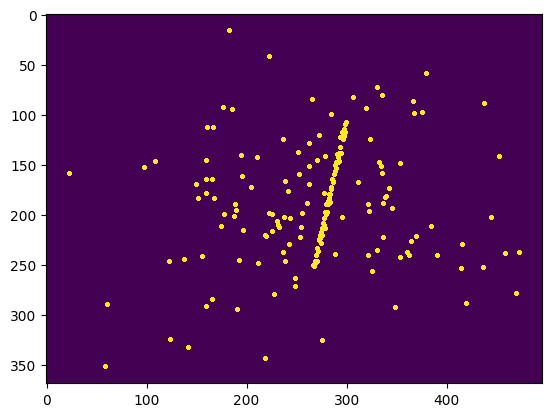

In [245]:
img = cv2.imread("noisydata.png") # read image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # to grayscale
gray = cv2.bitwise_not(gray) # invert colors
plt.imshow(gray)
plt.show()

In [246]:
lines = cv2.HoughLines(gray, 1, np.pi/90, 100, None, 3, 0)

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(img, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

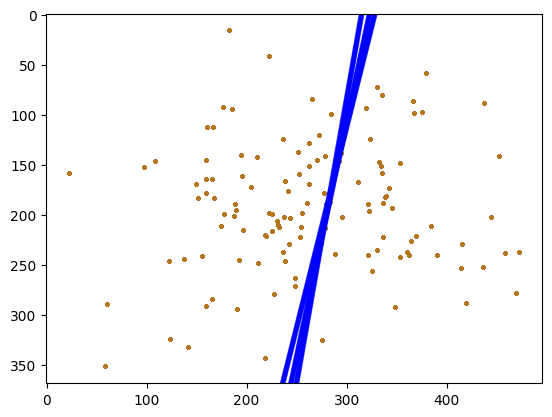

In [247]:
plt.imshow(img)
plt.show()

# Task 2

In [248]:
import numpy as np
import open3d as o3d

This data was gathered from internet: http://redwood-data.org/indoor_lidar_rgbd/download.html
It could be also downloaded from my drive: https://drive.google.com/file/d/1QT4_YwYNpvSsPYHt78zQ78SerKaL3QAq/view?usp=share_link

In [249]:
cloud = o3d.io.read_point_cloud('data/apt.ply')

In [250]:
np_cloud = np.asarray(cloud.points)

Visualization:
Execute cells below to visualize dataset

In [251]:
# o3d.visualization.draw_geometries([cloud])

In [252]:
'''
%matplotlib auto
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(np_cloud[:,0],np_cloud[:,1],np_cloud[:,2], s=2)
plt.show()
'''

'\n%matplotlib auto\nfig = plt.figure(figsize = (10, 7))\nax = plt.axes(projection ="3d")\nax.scatter3D(np_cloud[:,0],np_cloud[:,1],np_cloud[:,2], s=2)\nplt.show()\n'

Slicing data:

In [253]:
arr=[]
for line in np_cloud:
    if line[2]>-24.5 and line[2]<-24.4:
      arr.append(line)
arr = np.array(arr)

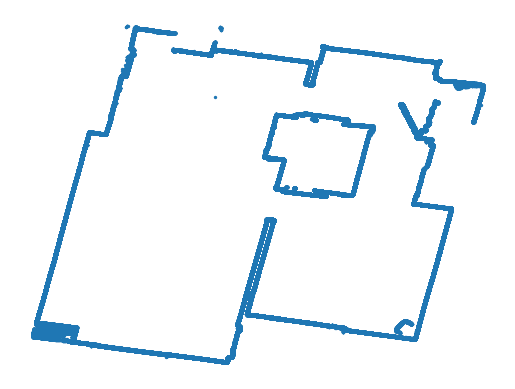

In [254]:
%matplotlib inline
plt.scatter(arr[:,0],arr[:,1], s=2)
plt.axis('off')
plt.savefig('LiDAR', bbox_inches='tight', pad_inches=0)
plt.show()

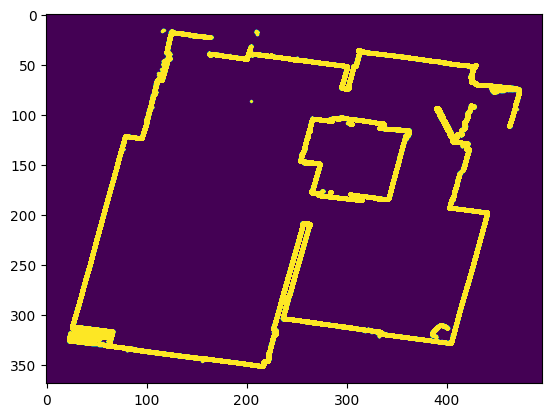

In [255]:
img = cv2.imread("LiDAR.png") # read image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # to grayscale
gray = cv2.bitwise_not(gray) # invert colors
plt.imshow(gray)
plt.show()

Placing lines

In [256]:
lines = cv2.HoughLinesP(gray, 1, np.pi/90, 100, None, 0, 0)
lines = lines.reshape(-1,4)

In [257]:
for i,j,k,l in lines:
    cv2.line(img, (i,j), (k,l), (0,0,255), 3, cv2.LINE_AA)
lines.shape

(108, 4)

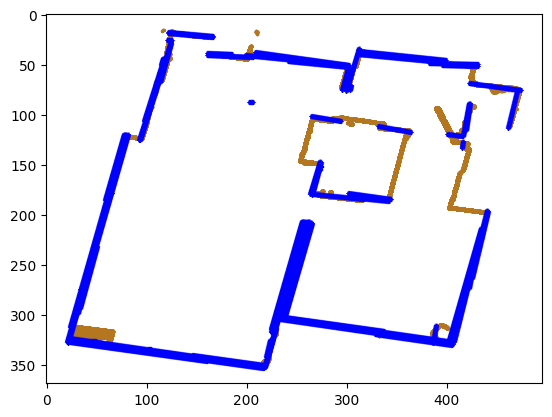

In [258]:
plt.imshow(img)
plt.show()